In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import pylab as pl
from sklearn.tree import DecisionTreeClassifier
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")
sample=pd.read_csv("sample_submission.csv")   
for df in [test,train]:
    df["eletrical1"]=df["Electrical"].map({"FuseP":3,"FuseF":2,"FuseA":1,"SBrkr":0})
    df["regiao"]=df["Street"].map({"Grvl":0,"Pave":1})
    df["ali"]=df["Alley"].map({"Grvl":1,"Pave":2})
    df["naosei"]=df["LotShape"].map({"IR3":0,"IR2":1,"IR1":2,"Reg":3})
    df["landc"]=df["LandContour"].map({"HLS":0,"Low":1,"Bnk":2,"Lvl":3})
    df["util"]=df["Utilities"].map({"NoSeWa":1,"AllPub":2})
    df["lotconf"]=df["LotConfig"].map({"FR3":0,"FR2":1,"Corner":2,"CulDSac":3,"Inside":4})
    df["landsl"]=df["LandSlope"].map({"Sev":0,"Mod":1,"Gtl":2})
    df["neighb"]=df["Neighborhood"].map({"Blueste":0,"SWISU":1,"BrDale":2,"Blmngtn":3,"NPkVill":4,
                                         "ClearCr":5,"StoneBr":6,"Gilbert":7,"Timber":8,"Edwards":9,"MeadowV":10,
                                        "IDOTRR":11,"NAmes":12,"SawyerW":13,"NridgHt":14,
                                         "Sawyer":15,"BrkSide":16,"OldTown":17,"NWAmes":18,"Somerst":19,"Mitchel":20,
                                        "NoRidge":21,"Crawfor":22,"Veenker":23,"CollgCr":24})
    df["cond1"]=df["Condition1"].map({"RRAe":3,"RRNn":2,"PosA":1,"RRNe":0,"Artery":4,"PosN":5,"Feedr":6,"Norm":7})
    df["cond2"]=df["Condition2"].map({"RRAe":3,"RRNn":2,"PosA":1,"Artery":4,"PosN":5,"Feedr":6,"Norm":7,"RRAn":0})
    df["blt"]=df["BldgType"].map({"Twnhs":0,"TwnhsE":1,"Duplex":2,"2fmCon":3,"1Fam":4})
    df["houst"]=df["HouseStyle"].map({"2.5Fin":0,"2.5Unf":1,"SLvl":2,"SFoyer":3,"1.5Unf":4,"1.5Fin":5,"1Story":6,"2Story":7})
    df["roofs"]=df["RoofStyle"].map({"Hip":0,"Gambrel":1,"Mansard":2,"Flat":3,"Shed":4,"Gable":5})
    df["roofm"]=df["RoofMatl"].map({"ClyTile":0,"Roll":1,"Tar&Grv":2,"Membran":3,"WdShake":4,
                                    "Metal":5,"WdShngl":6,"CompShg":7})
    df["exter1"]=df["Exterior1st"].map({"CBlock":0,"ImStucc":1,"Stone":2,"AsphShn":3,"BrkComm":4,"Stucco":5,
                                        "AsbShng":6,"Plywood":7,"CemntBd":8,"WdShing":9,"BrkFace":10,"HdBoard":11,
                                        "Wd Sdng":12,"MetalSd":13,"VinylSd":14})
    df["exter2"]=df["Exterior2nd"].map({"CBlock":0,"Other":1,"Stone":2,"AsphShn":3,"ImStucc":4,"Brk Cmn":5,"AsbShng":6,
                                        "Stucco":7,"BrkFace":8,"CmentBd":9,"Wd Sdng":10,"Plywood":11,"HdBoard":12,
                                        "Wd Shng":13, "MetalSd":14,"VinylSd":15})
    df["masvnt"]=df["MasVnrType"].map({"BrkFace":0,"None":1,"Stone":2})             
    df["exterq"]=df["ExterQual"].map({"Fa":0,"Ex":1,"TA":2,"Gd":3})
    df["exterc"]=df["ExterCond"].map({"Ex":0,"Po":1,"Fa":2,"Gd":3,"TA":4})
    df["found"]=df["Foundation"].map({"Stone":0,"Slab":1,"Wood":2,"BrkTil":3,"CBlock":4,"PConc":5})
    df["bsmtq"]=df["BsmtQual"].map({"TA":0,"Ex":1,"Gd":2,"Fa":3})
    df["bsmtc"]=df["BsmtCond"].map({"TA":0,"Ex":1,"Gd":2,"Fa":3})
    df["bsmte"]=df["BsmtExposure"].map({"No":0,"Mn":1,"Av":2,"Gd":3})
    df["bsmtf1"]=df["BsmtFinType1"].map({"Unf":0,"ALQ":1,"GLQ":2,"BLQ":3,"Rec":4,"LwQ":5})
    df["bsmtf2"]=df["BsmtFinType2"].map({"Unf":0,"ALQ":1,"GLQ":2,"BLQ":3,"Rec":4,"LwQ":5})
    df["heat"]=df["Heating"].map({"Floor":0,"OthW":1,"Wall":2,"Grav":3,"GasW":4,"GasA":5})
    df["heatqc"]=df["HeatingQC"].map({"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4})
    df["centralair"]=df["CentralAir"].map({"N":0,"Y":1})
    df["kitchq"]=df["KitchenQual"].map({"Fa":0,"Ex":1,"TA":2,"Gd":3})
    df["funct"]=df["Functional"].map({"Sev":0,"Maj2":1,"Mod":2,"Min2":3,"Maj1":4,"Min1":5,"Typ":6})
    df["firequ"]=df["FireplaceQu"].map({"Gd":1,"TA":2,"Fa":3,"Ex":4})
    df["garaget"]=df["GarageType"].map({"Attchd":0,"Detchd":1,"BuiltIn":2,"Basment":3,"CarPort":4})
    df["garagef"]=df["GarageFinish"].map({"Unf":0,"RFn":1,"Fin":2})
    df["garagequ"]=df["GarageQual"].map({"TA":0,"Gd":1,"Fa":2,"Ex":3,"Po":4})
    df["garagec"]=df["GarageCond"].map({"TA":0,"Gd":1,"Fa":2,"Ex":3,"Po":4})
    df["paved"]=df["PavedDrive"].map({"P":0,"N":1,"Y":2})
    df["pool"]=df["PoolQC"].map({"TA":1,"Ex":2})
    df["fence"]=df["Fence"].map({"MnPrv":1,"GdPrv":2,"GdWo":3,"GdWo":4})
    df["miscf"]=df["MiscFeature"].map({"Shed":1,"Gar2":2})
    df["salet"]=df["SaleType"].map({"Oth":0,"Con":1,"ConLw":2,"CWD":3,"ConLI":4,
                                   "ConLD":5,"COD":6,"New":7,"WD":8})
    df["salec"]=df["SaleCondition"].map({"Family":0,"Alloca":1,"AdjLand":2,"Partial":3,"Abnorml":4,"Normal":5}) 
    
test1=test.fillna(0)
test1["LotFrontage"]=test["LotFrontage"].fillna(21.000000)
test1["MSSubClass"]=test["MSSubClass"].fillna(20.000000)
test1["MoSold"]=test["MoSold"].fillna(1)
test1["MasVnrType"]=test["MasVnrType"].fillna(1)

train1=train.fillna(0)
train1["LotFrontage"]=train["LotFrontage"].fillna(21.000000)
train1["MSSubClass"]=train["MSSubClass"].fillna(20.000000)
train1["MoSold"]=train["MoSold"].fillna(1)
train1["MasVnrType"]=train["MasVnrType"].fillna(1)

tabela=["MSSubClass","LotArea","OverallQual","OverallCond","YearBuilt","YearRemodAdd","BsmtFinSF1","LotFrontage","MasVnrArea",
       "BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath",
       "FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","GarageArea","GarageYrBlt",
       "WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold","eletrical1",
        "regiao","ali","naosei","landc","util","lotconf","landsl","neighb","cond1","cond2","blt","houst","roofs","roofm",
        "exter1","exter2","masvnt","exterq","exterc","found","bsmtq","bsmtc","bsmte","bsmtf1","bsmtf2","heat","heatqc",
        "centralair","kitchq","funct","firequ","garaget","garagef","garagequ","paved","pool","fence","miscf","salet","salec"]
xtr=train1[tabela]
ytr=train1["SalePrice"]
xts=test1[tabela]
yts=sample["SalePrice"]

In [5]:
xg=XGBRegressor(random_state=5,learning_rate=0.01,n_estimators=300)
xg.fit(xtr,ytr)
pr2=xg.predict(xts)

In [23]:
dmc=DecisionTreeClassifier(random_state=5,min_samples_split=7)
dmc.fit(xtr,ytr)
pr3=dmc.predict(xts)

In [24]:
mean_absolute_error(yts,pr3)

51804.24736558991

In [6]:
mean_absolute_error(yts,pr2)

53167.438325518946

In [ ]:
leaar0.9 =58206.55103972301
lear0.2  =54875.99864553051
lear0.1  =54827.34411258363
lear0.01 =54596.085220918336
lear0.02 =54836.0612346918
lear0.03 =54627.78251331152
lear0.09 =54988.24635299054
lear0.001=162237.95
n10000=54838.89220991333
n1000 =54596.085220918336
n5000 =54829.519701820376
n900  =54583.86848445685
n100  =72990.2755285404
n500  =54016.688989066155
n600  =54270.66825290566
n400  =53676.15442247671
n300  =53320.483567223644
n200  =54542.70021470589

In [213]:
train.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 123 columns):
 #    Column         Non-Null Count  Dtype  
---   ------         --------------  -----  
 0    Id             1460 non-null   int64  
 1    MSSubClass     1460 non-null   int64  
 2    MSZoning       1460 non-null   object 
 3    LotFrontage    1201 non-null   float64
 4    LotArea        1460 non-null   int64  
 5    Street         1460 non-null   object 
 6    Alley          91 non-null     object 
 7    LotShape       1460 non-null   object 
 8    LandContour    1460 non-null   object 
 9    Utilities      1460 non-null   object 
 10   LotConfig      1460 non-null   object 
 11   LandSlope      1460 non-null   object 
 12   Neighborhood   1460 non-null   object 
 13   Condition1     1460 non-null   object 
 14   Condition2     1460 non-null   object 
 15   BldgType       1460 non-null   object 
 16   HouseStyle     1460 non-null   object 
 17   OverallQual    1460 non-null   

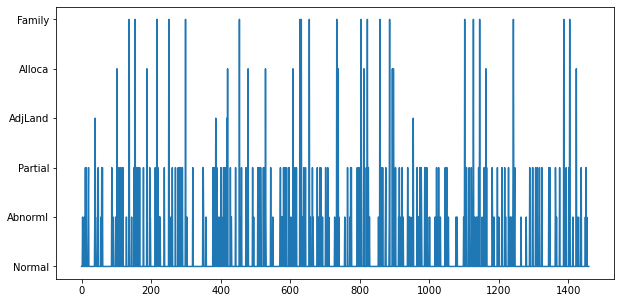

In [211]:
pl.figure(figsize=(10,5))
plt.plot(train1["SaleCondition"])
#SaleCondition,Family:0,Alloca:1,AdjLand:2,Partial:3,Abnorml:4,Normal:5

In [206]:
train["MiscFeature"].tail(-105)#MiscFeature,Shed:1,Gar2:2,:3,:4

105      NaN
106     Shed
107      NaN
108      NaN
109      NaN
        ... 
1455     NaN
1456     NaN
1457    Shed
1458     NaN
1459     NaN
Name: MiscFeature, Length: 1355, dtype: object

In [17]:
my_submission=pd.DataFrame()
my_submission["SalePrice"]=pr2
my_submission["Id"]=test["Id"]

In [18]:
filename = 'submission.csv'
my_submission .to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: submission.csv
